In [1]:
import numpy as np

In [2]:
#2d vector as input, 1 hidden layer with 3 nodes and 1 output node

X = np.array([[1,1]])
y = np.array([[0]])




W =  [
np.array([[-0.0053, 0.3793],[-0.5820, -0.5204],[-0.2723, 0.1896]], dtype=np.float32).T, #Weights1
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32), #bias1
    np.array([[ 0.1528,-0.1745,-0.1135]],dtype=np.float32).T, #weights2
    np.array([-0.5516], dtype=np.float32) #bias 2
]


In [3]:
def activation(inputs):
    return 1/(1+np.exp(-inputs))

In [4]:
def feedforward(inputs, outputs, weights):
    hidden = activation(np.dot(X,weights[0]) + weights[1])
    out = np.dot(hidden,weights[2])+weights[3]
    mean_squared_error = np.mean(np.square(out - outputs))
    return mean_squared_error
    
feedforward(X,y,W)    

np.float64(0.33455008989960927)

In [11]:
from copy import deepcopy

def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)
    original_loss = feedforward(inputs,outputs,original_weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            new_loss = feedforward(inputs,outputs,temp_weights)
            grad = (new_loss-original_loss)/(0.0001)
            updated_weights[i][index] -=grad*lr
            
    return updated_weights, original_loss
            

In [12]:
losses = []
for epochs in range(100):
    W, loss = update_weights(X,y,W,0.01)
    losses.append(loss)

Text(0, 0.5, 'Loss value')

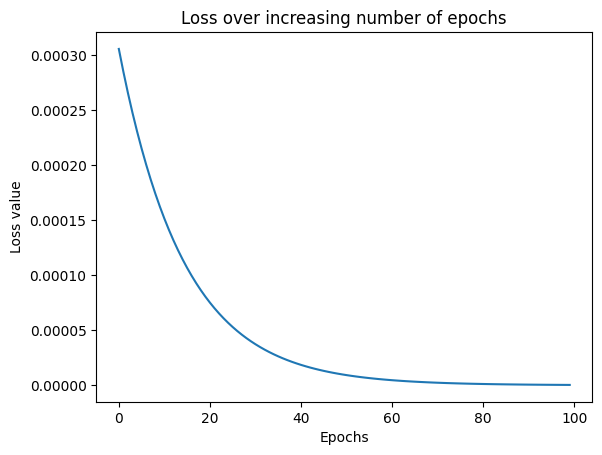

In [15]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title('Loss over increasing number of epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss value')

In [14]:
#Testing if the neural net predicts 0 (or close to 0) when input is [1,1]

hidden = activation(np.dot(X,W[0]) + W[1])
out = np.dot(hidden,W[2])+W[3]
print(out)

[[-0.00055506]]
